# tmdb-movie-dataset

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="tmdb-movie-dataset")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashutoshnemani3/tmdb-movie-dataset" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashutoshnemani3/tmdb-movie-dataset


'https://jovian.ai/ashutoshnemani3/tmdb-movie-dataset'

In [5]:
!pip install pandas_explode --quiet

# Project - Investigate the IMDB Movie DataSet

## Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Aanalysis
* Conclusions

In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In this step,we understand the data,clean the data and convert it to a format that makes sense to analyse.For this
* We check duplicate rows.
* We check null values
* We drop non essential columns

In [2]:
## reading from the file
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.duplicated().sum()

1

In [5]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Some Observations for data description.
* Total rows are 10866
* Total columns are 21

### Observations for null values
* Homepage has 7930 rows that are null
* Production companies of 1030 rows are null
* Director of 44 rows are missing.
* Cast of 76 rows are missing
* 2824 movies/rows have no tagline
* 4 movies have no overview

### Observations for duplicate rows
* There is one duplicate row

In [6]:
# drop duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
type(df.release_date[0])

str

* The columnn imdb_id  do not contribute any analysis and so we can drop the  column.
* There are 10 movies that don't have any homepage. We drop homepage column as it doesn't add any value to our analysis.
* Tagline and overview are very specific to individual movies and hence we drop those columns for our analysis.
* So to conclude we remove ['imdb_id','homepage','tagline','overview']

In [8]:
df.drop(columns = ['imdb_id','homepage','tagline','overview','keywords'],inplace=True,axis = 1)

In [9]:
##Convert releasedate from string format to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
type(df.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

In [11]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

Now we have completed the data wrangling by dropping the not required columns and removing duplicate values.

# Exploratory Data Analysis

## Some Questions we want to answer by this analysis:

1. Which genres movies are more popular?
2. Which genres movies are usually the longest and shortest/
3. Do more popular movies usually fall in high bracket?
4. Have longer movies been more popular than the shorter ones?
5. Did longer movies have higher average vote ratings from 1960 to 2015?
6. Do movies having higher budget more popular than movies with lower budget?
7. What was the proportion of movies for each genre from 1960 to 2015?
8. Get the top 10 actors who have acted in most movies from 1960 to 2015.
9. Get the top 10 movies with avergae vote ratings.
10. Get the top 10 movies with popularity.
11. Get the top 10 directors with max Popularity.
12. From 1960 to 2015,in total which was the favourite month for producers to release their movies?

In [12]:
## write the updated dataframe to a csv
df.to_csv('movie_data_modified.csv',index=False)

In [13]:
df = pd.read_csv('movie_data_modified.csv')
df['release_date'] = pd.to_datetime(df['release_date'])

# What genre movies are more popular?

In [14]:
##split by seperator
def splitbyseperator(column,seperator):
    return column.str.split(seperator,expand=True)

In [15]:
## create a copy of genre
df_copy_genre = df.copy()

In [16]:
## split then genre column and convert it to an array 
## eg 'Action|Thriller|Horror' = ['Action','Thriller','Horror']
df_copy_genre['genres'] = df_copy_genre.genres.str.split('|')

In [17]:
## Now we use explode function
## to give each genre its individual row
df_genre_multiple = df_copy_genre.explode('genres')
df_genre_multiple.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [18]:
df_genre = df_genre_multiple[['popularity', 'genres','release_year']]
df_genre.head()

,popularity,genres,release_year
0,32.985763,Action,2015
0,32.985763,Adventure,2015
0,32.985763,Science Fiction,2015
0,32.985763,Thriller,2015
1,28.419936,Action,2015


In [19]:
##group by genre and get popularity
df_genre_grouped = df_genre_multiple.groupby(['release_year','genres']).popularity.mean()
genre_yearwise = df_genre_grouped.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [20]:
genre_yearwise.reset_index(level=2,inplace=True)

In [21]:
genre_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [22]:
genre = genre_yearwise.genres.value_counts()
genre

Adventure          14
Animation          10
Fantasy             8
Crime               5
War                 3
Action              3
Family              3
Mystery             2
Music               2
Science Fiction     2
Western             2
Thriller            1
History             1
Name: genres, dtype: int64

In [23]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

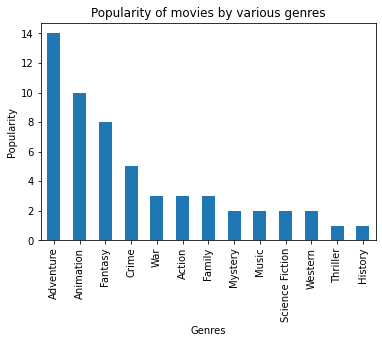

In [24]:
genre.plot.bar(title="Popularity of movies by various genres",xlabel="Genres",ylabel="Popularity");

## Result:
* Usually <b>Adventure</b> kind of movies are more popular <b>followed by Animation and Fantasy</b>.
* From 2001 to 2007 fantasy movies were most popularity consistently.
* From 2008 to 2015 adventure movies were more popular except in 2011 and 2012

# What genre of movies have usually been longest?

In [25]:
runtime_genre = df_genre_multiple.groupby('genres').runtime.mean().sort_values()

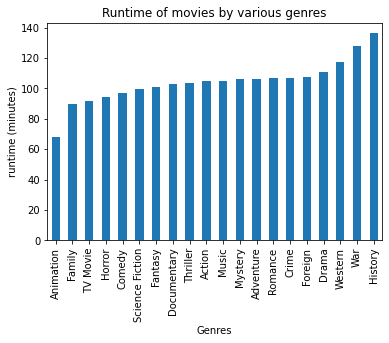

In [26]:
runtime_genre.plot.bar(title = 'Runtime of movies by various genres',xlabel='Genres',ylabel='runtime (minutes)');

# Results

#### By aggregate running time of various kind of genre movies we conclude that.

* <b>History</b> movies are usually the longest(>2 hours).
* War movies are the 2nd longest (>approx 2 hours)
* Animation movies are usually the shortest(around 70 minutes)
* Family,TV Movies and horror are usually the next shorter set of movies

# Do More popular movies usually fall in high revenue bracket?

In [27]:
##source of quantilecut code https://medium.com/@onpillow/02-investigate-tmdb-movie-dataset-python-data-analysis-project-part-2-exploratory-data-4839f697092
def cut_into_quantile(dfname,column_name):
    """
        cut_into_quantile takes data frame and column name as param.
        returns the dataframe with an additional column "columnname_levels" and divide it into 4 quantiles.
    """
    ## find quartile,max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    ## bin edges that will be used to cut data in groups
    bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]
    ## labels for the four budget level groups
    bin_names = ['Low','Medium','Moderately High','High']
    ## Create budget levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name],bin_edges,labels=bin_names,include_lowest=True)
    return dfname

In [28]:
df_non_zero_rev = df[df['revenue_adj'] != 0]
df_data_revenue_bins = df_non_zero_rev[df_non_zero_rev['release_year'].isin([2010,2011,2012,2013,2014,2015])].copy()

In [29]:
df_data_revenue_quantile =  cut_into_quantile(df_data_revenue_bins,'revenue_adj')

In [30]:
revenue_frame = df_data_revenue_quantile.groupby(['release_year','revenue_adj_levels']).popularity.mean().to_frame()

In [31]:
revenue_frame.reset_index(level=0,inplace=True)

In [32]:
revenue_frame.reset_index(level=0,inplace=True)

In [33]:
low_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Low'].popularity.tolist()
medium_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Medium'].popularity.tolist()
mod_high_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Moderately High'].popularity.tolist()
high_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'High'].popularity.tolist()

In [34]:
len(high_revenue_pop)
release_years = [2010,2011,2012,2013,2014,2015]

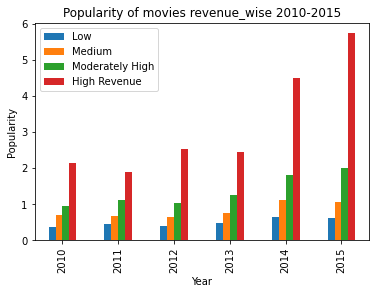

In [35]:
plotdata = pd.DataFrame({
    "Low": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately High": mod_high_revenue_pop,
    "High Revenue": high_revenue_pop
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies revenue_wise 2010-2015')
plt.xlabel("Year")
plt.ylabel("Popularity");

## Observations - Relation between revenue and popularity of movies

* Seeing the trend from 2010 to 2015 ,higher revenue movies have more popularity.This can be validated by the hypothesis that more revenue implies more tickets sold implies more people have watched the movie and hence the popularity.
* Also if we see from 2013 to 2015.there is a drastic shift in popularity of high revenue movies as compared to other categories (200% approx increase).This could be due to surge in social media users number and thus more popularity.

In [36]:
release_year_latest = [2010,2011,2012,2013,2014,2015]

# Have longer movies been more popular than the shorter ones?

In [37]:
## running time bins
df_copy=df[df['release_year'].isin(release_year_latest)].copy()
df_copy = df_copy[df_copy['runtime'] != 900]
df_runtime_bins = cut_into_quantile(df_copy,'runtime')

In [38]:
df_copy[df_copy['runtime'] >= 400]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_levels
2169,367186,0.082894,0,0,The Pillars of the Earth,Ian McShane|Matthew Macfadyen|Eddie Redmayne|H...,Sergio Mimica-Gezzan,421,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,2010-07-23,22,7.3,2010,0.0,0.0,High
2213,189197,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,2010-05-16,183,7.8,2010,120000000.0,0.0,High
6007,222724,0.141918,0,0,Crystal Lake Memories: The Complete History of...,Corey Feldman,Daniel Farrands,400,Documentary,Hutson Ranch Media,2013-09-13,10,6.9,2013,0.0,0.0,High


In [39]:
popularitybyruntime = df_runtime_bins.groupby(['release_year','runtime_levels']).popularity.median().to_frame()
popularitybyruntime.reset_index(inplace=True)

In [40]:
popularitybyruntime

,release_year,runtime_levels,popularity
0,2010,Low,0.264378
1,2010,Medium,0.321694
2,2010,Moderately High,0.561787
3,2010,High,0.580262
4,2011,Low,0.317511
5,2011,Medium,0.349834
6,2011,Moderately High,0.479016
7,2011,High,0.587045
8,2012,Low,0.258171
9,2012,Medium,0.310779


In [41]:
short_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Low'].popularity.tolist()
medium_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Medium'].popularity.tolist()
mod_long_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Moderately High'].popularity.tolist()
long_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'High'].popularity.tolist()

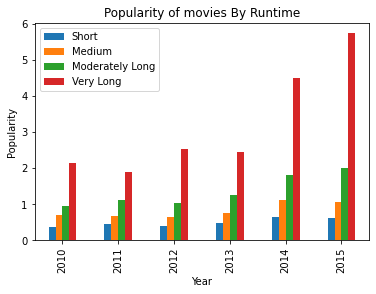

In [42]:
plotdata = pd.DataFrame({
    "Short": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately Long": mod_high_revenue_pop,
    "Very Long": high_revenue_pop
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Popularity");

In [43]:
popularitybyruntime

,release_year,runtime_levels,popularity
0,2010,Low,0.264378
1,2010,Medium,0.321694
2,2010,Moderately High,0.561787
3,2010,High,0.580262
4,2011,Low,0.317511
5,2011,Medium,0.349834
6,2011,Moderately High,0.479016
7,2011,High,0.587045
8,2012,Low,0.258171
9,2012,Medium,0.310779


## Results for Runtime and popularity

* Very Long movies have been <b>more popular</b> than their other versions from 2010 to 2015.
* From 2010-2015 as length of movie increased,popularity of movies have also increased based on above graph

# Do longer movies have higher average vote ratings?

In [44]:
vote_avgbyruntime = df_runtime_bins.groupby(['release_year','runtime_levels']).vote_average.mean().to_frame()

In [45]:
vote_avgbyruntime.reset_index(inplace=True)

In [46]:
vote_avgbyrunbins = vote_avgbyruntime[vote_avgbyruntime['release_year'].isin([2010,2011,2012,2013,2014,2015])].copy()

In [47]:
### 
short_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Low'].vote_average.tolist()
medium_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Medium'].vote_average.tolist()
mod_long_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Moderately High'].vote_average.tolist()
long_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'High'].vote_average.tolist()

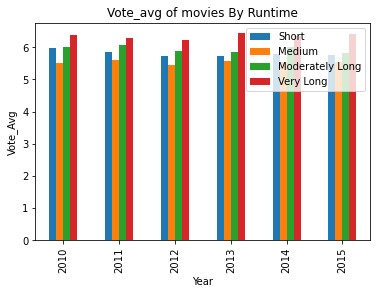

In [48]:
plotdata = pd.DataFrame({
    "Short": short_movie_vote,
    "Medium": medium_movie_vote,
    "Moderately Long": mod_long_movie_vote,
    "Very Long": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Vote_avg of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Vote_Avg");

# Do movies having higher budget more popular than movies with lower budget?

In [49]:
df_c = df[df['budget_adj']!=0].copy()
df_budget_group = cut_into_quantile(df_c,'budget_adj')

In [50]:
df_budget_filtered_data = df_budget_group[df_budget_group['release_year'].isin([2010,2011,2012,2013,2014,2015])]
    
df_popularity_on_budget = df_budget_filtered_data.groupby(['release_year','budget_adj_levels']).popularity.mean().to_frame().reset_index()

In [51]:
short_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Low'].popularity.tolist()
medium_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Medium'].popularity.tolist()
mod_long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Moderately High'].popularity.tolist()
long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'High'].popularity.tolist()

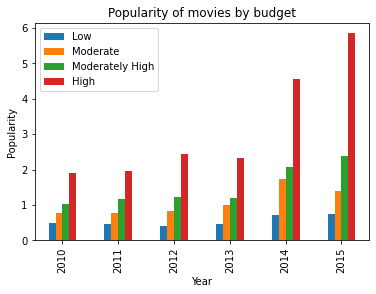

In [52]:
plotdata = pd.DataFrame({
    "Low": short_movie_vote,
    "Moderate": medium_movie_vote,
    "Moderately High": mod_long_movie_vote,
    "High": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies by budget')
plt.xlabel("Year")
plt.ylabel("Popularity");

## Results - Budget and Popularity 

* Seeing the latest trends in above graph we could say Higher budget movies are more popular.
* Higher budget movies have higher marketing expense as compared to the lower budget movies 

# What was the proportion of each genre of movies from 1960 to 2015

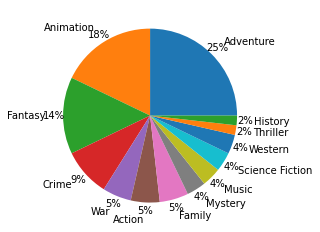

In [53]:
plt.pie(genre,labels=genre.index,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

## Results

* From 1960 to 2015 Adventure genre was more prevalent (25%) followed by Animation (18%), Fantasy (14%) 
* History (2%), Thriller (2%), Music (4%) and Western (4%) movies were few in number as compared to other genres.

In [54]:
def splitbysepandaddnewrows(dataframe,column_name,seperator):
    """
        takes dataframe,column_name and seperator
        returns the data frame by adding new rows for every seperator and individual entry.
    """
    dataframe[column_name] = dataframe[column_name].str.split(seperator)
    return dataframe.explode(column_name)

# Top 10 actors that acted in most number of movies from 1960 to 2015

In [55]:

castdata = splitbysepandaddnewrows(df.copy(),'cast','|').cast.value_counts().sort_values(ascending=False)
castdata.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Susan Sarandon       48
Name: cast, dtype: int64

# Top 10 Movies by Average Votes

In [56]:
top_10_movies_by_vote = df.sort_values(by = ['vote_average'],ascending = False)[['original_title','vote_average']].head(10)
top_10_movies_by_vote.reset_index(drop=True,inplace=True)
top_10_movies_by_vote.set_index('original_title',inplace=True)
top_10_movies_by_vote

,vote_average
original_title,
The Story of Film: An Odyssey,9.2
The Mask You Live In,8.9
Black Mirror: White Christmas,8.8
Life Cycles,8.8
Pink Floyd: Pulse,8.7
Opeth: In Live Concert At The Royal Albert Hall,8.6
The Art of Flight,8.5
Queen - Rock Montreal,8.5
A Personal Journey with Martin Scorsese Through American Movies,8.5


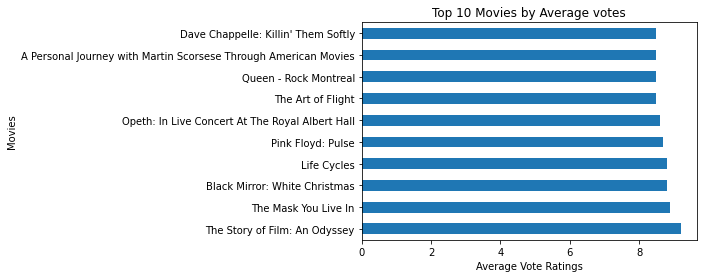

In [57]:
top_10_movies_by_vote.vote_average.plot(kind='barh')
plt.title('Top 10 Movies by Average votes')
plt.ylabel('Movies')
plt.xlabel('Average Vote Ratings');

## Observations

* Above are the top 10 movies byvote ratings.
* The Story of Film: An Odyssey,The Mask You Live In are the top 2 movies by ratings. 

# Top 10 Movies by popularity

In [58]:
top_movie_by_pop = df.sort_values(by = ['popularity'],ascending = False)[['original_title','popularity']].head(10)
top_movie_by_pop.reset_index(drop=True,inplace=True)
top_movie_by_pop.set_index('original_title',inplace=True)
top_movie_by_pop

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


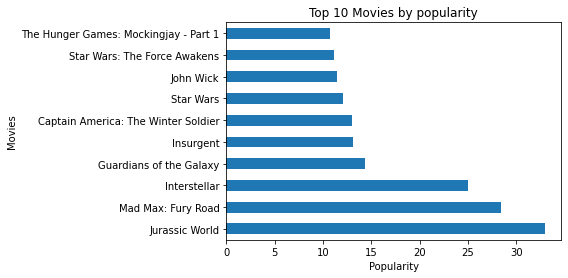

In [59]:
top_movie_by_pop.popularity.plot(kind='barh')
plt.title('Top 10 Movies by popularity')
plt.ylabel('Movies')
plt.xlabel('Popularity');

## Observations

* Jurassic World,Mad Max: Fury Road and Interstellar are the top 3 movies based on popularity.

# Top 10 Directors by Average Votes

In [60]:
### Top 10 Directors by average vote Ratings
director_explode_df = splitbysepandaddnewrows(df.copy(),'director','|');
top_10_directors_rating = director_explode_df.groupby('director').vote_average.mean().to_frame().sort_values(ascending=False,by = ['vote_average']).head(10);
top_10_directors_rating

,vote_average
director,
Mark Cousins,9.2
Derek Frankowski,8.8
David Mallet,8.7
Curt Morgan,8.5
James Payne,8.5
Michael Henry Wilson,8.5
Saul Swimmer,8.5
Jorge RamÃ­rez SuÃ¡rez,8.4
Anthony Mandler,8.4


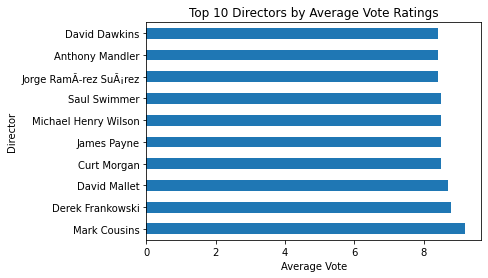

In [61]:
top_10_directors_rating.vote_average.plot(kind='barh')
plt.title("Top 10 Directors by Average Vote Ratings")
plt.xlabel("Average Vote")
plt.ylabel("Director");

## Observations

* Mark Cousins is the top director by average vote ratings.It could be attributed to the movie "The Story of Film: An Odyssey" directed by him.
* The other top directors are as above Derek Frankowski,David Mallet,Curt Morgan

# Top 10 Directors by Popularity

In [62]:
top_10_director_popularity = director_explode_df.groupby('director').popularity.mean().to_frame().sort_values(ascending=False,by=['popularity']).head(10)
top_10_director_popularity

,popularity
director,
Colin Trevorrow,16.696886
David Leitch,11.422751
Chad Stahelski,11.422751
Juno John Lee,8.411577
Alan Taylor,6.883129
Peter Richardson,6.668990
Christopher Nolan,6.195521
Alex Garland,6.118847
Patrick Tatopoulos,5.806897


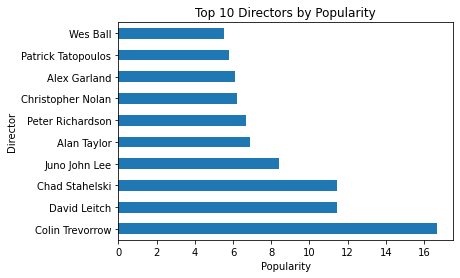

In [63]:
top_10_director_popularity.popularity.plot(kind='barh')
plt.title("Top 10 Directors by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Director");

## Observations

* Colin Trevorrow directed Jurassic world.He is the director whose movies have max average popularity.
* The other directors whose movies have more popularity is David Leitch,Chad Stahelski,Juno Joh Lee and Alan Taylor

# Month and number of movies released in that  month

In [64]:
df['Month'] = df['release_date'].dt.month

In [65]:
no_of_movies_by_month = df.groupby('Month').id.count()
labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

no_of_movies_by_month

Month
1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: id, dtype: int64

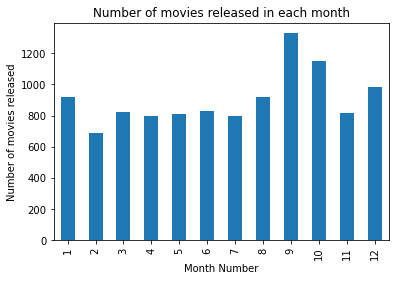

In [66]:
no_of_movies_by_month.plot(kind='bar',title="Number of movies released in each month",xlabel="Month Number",ylabel="Number of movies released",x=labels);

In [67]:
df_year_month_group = df.groupby(['release_year','Month']).id.count()

In [68]:
df_year_month_group.to_frame().reset_index(drop=True,inplace=True)

In [69]:
df_year_month_group.groupby(level = 'release_year').nlargest(1).to_frame()

,,,id
release_year,release_year,Month,
1960,1960,8,5
1961,1961,12,7
1962,1962,6,8
1963,1963,6,10
1964,1964,10,8
1965,1965,6,8
1966,1966,12,9
1967,1967,12,9
1968,1968,10,6


### Observations

* Most number of movies were released in the 9th month of year(Septmeber) followed by October.
* December and January were the next favourite months for release of the movies.

In [70]:
df[df['revenue_adj'] != 0].count()

id                      4849
popularity              4849
budget                  4849
revenue                 4849
original_title          4849
cast                    4844
director                4848
runtime                 4849
genres                  4849
production_companies    4753
release_date            4849
vote_count              4849
vote_average            4849
release_year            4849
budget_adj              4849
revenue_adj             4849
Month                   4849
dtype: int64

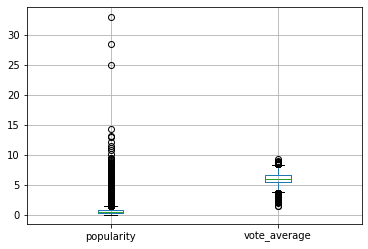

In [71]:
df.boxplot(column=['popularity','vote_average']);

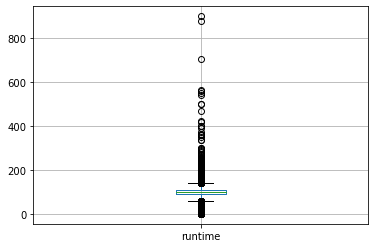

In [72]:
df.boxplot(column=['runtime']);

* Popularity has 3 outlier values around 25,28 and 32,
* Vote_average has no outliers
* Runtime column also has outliers.


## Conclusion



Based on the data set analysis we tried to answer a total of 12 questions. Out of which 6 were quantitative and 6 were qualitative. We classified the movies in low budget, moderate budget, high budget and very high budget movies. Based on the latest 5 years 2010 to 2015, we tried to answer Do high budget movies had high popularity? Based on the data we found it looks that high budget movies tend to be more popular. We also classified movies based on short, medium and moderate and very long movies based on their runtime, we found that very long movies are more popular than long movies. Also long > medium > short in terms of popularity. If we go by average votes very long movies again tops the list while medium length movies were found to be least popular among all the five years from 2010 to 2015.In this analysis, we also answered what genres were most popular? The answer for this question came out to be Adventure (25%) followed by Animation and Fantasy. Also we tried to identify what genre of movies have been the longest. The analysis shows that History and war movies to be the longest whereas animation movies usually had the least running time. Also if you are planning for a movie weekend and wish to enjoy the top rated movies in period 1960-2015 "The Story of Film: An Odyssey" and "The Mask You Live In" must be included in your list as they are the top 2 popular movies. We then also dived and tried to identify what genre movies are more popular? We found Adventure movies had highest average popularity followed by Animation whereas History movies tends to have least popularity.

Based on our analysis we also found that September month is when most number of movies were released in this period.
(https://en.wikipedia.org/wiki/Dump_months)

## Summary Conclusion

* Higher budget movies usually had more popularity as compared to lower budget movies.
* Movie nakers referred September and October month for releasing their movie followed by December and January
* Colin Trevorrow is the director whose movies have the max popularity.
* Mark Cousins is the director whose movies have the max average voter ratings.
* Jurassic World was the most popular movie.
* The Story of Film An Odyssey has got the highest average rang of 9.2.
* Higher budget movies were found to be more popular than their lower counterparts.
* Robert D Niro has acted in most movies (72) from 1960 to 2015.
* From 1960 to 2015 adventure movies were most prominent and constituted the largest proportion of all movie genres from 1960 to 2015 (25%).
* Very Long movies are found to be more popular and have higher vote_avg ratings than their shorter counterparts.

## Limitations

In all the anlaysis we have identified the relation between revenue and popullarity ,budget and popularity,runtime and popularity.However we cannot conclude that one is the cause of other becuse <b>Correlation do not imply causation</b>


* 50% of the revenue values and budget values are zero. Because of this revenue and budget analysis could be done for only approx. 50% of the rows and we lacked the data for other 50%.
* Popularity and runtime have outlier values if we compare their maximum. Popularity as per data source blog is calculated based on the ratings so there is no limit on max value. However for runtime we see the max value of 900 which is way too high than the mean.
* For relation between revenue and popularity, we could analyze only 50% of the data instead of all the data as revenue_adj field set to zero for other 50%. This is the case of data missing.
* For relation between budget and popularity, we could analyze again only 50% of the data, instead of all data as budget_adj field set to zero for other 50%.This is the case of data missing.
* In above both cases for the data analysis we filtered non-zero values and proceeded with our analysis of other 50% values as dropping 50% data could make us loose on other parameters like popularity, average votes.
* Since there are around 10,500 data points, we do not use scatter plot as this could run into the issue of over-plotting.
* We hypothesized that higher budget movies usually are more popular because their marketing budget tend to be more. Our data validates this hypothesis. However we cannot conclude that higher budget is the cause of popularity .This hypothesis rests on the assumption that every movie budget has its substantial component as marketing budget.
* For each movie, there are more than one director given. However for a particular movie, there is usually a main film director followed by sub-directors. We don’t have the data of who is main director. This could led to some sub-directors also getting in the top director list for the same movies.
* Director of 44 movies are missing. This made our top director analysis not inclusive of all movies.There could also be some directors whose movies could be missing.
* Each Movie has multiple genres. However usually every movie has one main genre and other genre elements are in minor nature. For example Jurassic world as per web search on Google engine is of Action and Science Fiction genre. However in our dataset, we found that The movie also has action and thriller elements in it. So this classification is vague and this vagueness has led us to consider Jurassic World as a thriller film, science fiction, action and adventure. And the same movie is counted in all 4 genres.
   
 

 
